## Cobre

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

T = np.zeros((100,100))
T.fill(110)

T_inf = 110
k = 401 #W/mK
rho = 8933 #kg/m3
Cp = 385 #J/kgk
l = 0.001 #m
dt = 0.0021#s
alpha = k/(rho*Cp)
tau = alpha*dt/(l**2)
h = 500 #W/m2K
Bi = h*l/k

#Condiciones iniciales 20C
for i in range(20,100):
    for j in range(15,36):
        T[i, j] = 20
for i in range(50,70):
    for j in range(35,66):
        T[i, j] = 20
for i in range(20,100):
    for j in range(65,86):
        T[i, j] = 20

it = int(10000)   
time_C_H = np.zeros(it)
Temp_C_H = np.zeros(it)

for t in range(it):
    
    mean = np.mean(T[50:71 , 36:65])
    time_C_H[t] = t*dt
    Temp_C_H[t] = mean
    if  (99.5 < mean < 100):
        t_100_C = t*dt
        
    #Columna 1      
    for i in range(20,100):
        for j in range(15,36):
            #Nodo 1
            if i == 20 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1] + T[i+1,j] + 3*Bi*T_inf)
            elif (i == 20 and j == 35):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1] + T[i+1,j] + 3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            #Nodo 3 izquierda
            elif i == 50 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 15 < j < 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            
    #Barra horizontal
    for i in range(50,71):
        for j in range(36,65):
            #Nodo 2
            if i == 50 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif i == 70 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 4*Bi*T_inf)
            #Nodo 6
            else:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

    #Columna 2
    for i in range(20,100):
        for j in range(65,86):
            #Nodo 1
            if (i == 20 and j == 65):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1]+T[i+1,j]+3*Bi*T_inf)
            elif (i == 20 and j == 85):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1]+T[i+1,j]+3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            #Nodo 3 derecha
            elif i == 50 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 65 < j < 85:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

## Aluminio

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

T = np.zeros((100,100))
T.fill(110)

T_inf = 110
k = 237 #W/mK
rho = 2702 #kg/m3
Cp = 903 #J/kgk
l = 0.001 #m
dt = 0.0021#s
alpha = k/(rho*Cp)
tau = alpha*dt/(l**2)
h = 500 #W/m2K
Bi = h*l/k

#Condiciones iniciales 100C
for i in range(20,100):
    for j in range(15,36):
        T[i, j] = 20
for i in range(50,70):
    for j in range(35,66):
        T[i, j] = 20
for i in range(20,100):
    for j in range(65,86):
        T[i, j] = 20

it = int(10000)   
time_A_H = np.zeros(it)
Temp_A_H = np.zeros(it)

for t in range(it):
    
    mean = np.mean(T[50:71 , 36:65])
    time_A_H[t] = t*dt
    Temp_A_H[t] = mean
    
    if  (99.5 < mean < 100):
        t_100_A = t*dt
    
    #Columna 1      
    for i in range(20,100):
        for j in range(15,36):
            #Nodo 1
            if i == 20 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1] + T[i+1,j] + 3*Bi*T_inf)
            elif (i == 20 and j == 35):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1] + T[i+1,j] + 3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            #Nodo 3 izquierda
            elif i == 50 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 15 < j < 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            
    #Barra horizontal
    for i in range(50,71):
        for j in range(36,65):
            #Nodo 2
            if i == 50 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif i == 70 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 4*Bi*T_inf)
            #Nodo 6
            else:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

    #Columna 2
    for i in range(20,100):
        for j in range(65,86):
            #Nodo 1
            if (i == 20 and j == 65):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1]+T[i+1,j]+3*Bi*T_inf)
            elif (i == 20 and j == 85):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1]+T[i+1,j]+3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            #Nodo 3 derecha
            elif i == 50 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 65 < j < 85:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

## Acero

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

T = np.zeros((100,100))
T.fill(110)

T_inf = 110
k = 63.9 #W/mK
rho = 7832 #kg/m3
Cp = 434 #J/kgk
l = 0.001 #m
dt = 0.0021#s
alpha = k/(rho*Cp)
tau = alpha*dt/(l**2)
h = 500 #W/m2K
Bi = h*l/k

#Condiciones iniciales 100C
for i in range(20,100):
    for j in range(15,36):
        T[i, j] = 20
for i in range(50,70):
    for j in range(35,66):
        T[i, j] = 20
for i in range(20,100):
    for j in range(65,86):
        T[i, j] = 20

it = int(10000)   
time_S_H = np.zeros(it)
Temp_S_H = np.zeros(it)

for t in range(it):
    
    mean = np.mean(T[50:71 , 36:65])
    time_S_H[t] = t*dt
    Temp_S_H[t] = mean
    
    if  (99.5 < mean < 100):
        t_100_S = t*dt
    
    #Columna 1      
    for i in range(20,100):
        for j in range(15,36):
            #Nodo 1
            if i == 20 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1] + T[i+1,j] + 3*Bi*T_inf)
            elif (i == 20 and j == 35):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1] + T[i+1,j] + 3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            #Nodo 3 izquierda
            elif i == 50 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j-1] + 2*T[i,j+1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 15:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (15 < j < 35):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 15 < j < 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 35:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            
    #Barra horizontal
    for i in range(50,71):
        for j in range(36,65):
            #Nodo 2
            if i == 50 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif i == 70 and (36 <= j <= 64):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 4*Bi*T_inf)
            #Nodo 6
            else:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

    #Columna 2
    for i in range(20,100):
        for j in range(65,86):
            #Nodo 1
            if (i == 20 and j == 65):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j+1]+T[i+1,j]+3*Bi*T_inf)
            elif (i == 20 and j == 85):
                T[i,j] = T[i,j]*(1-tau*(4+6*Bi)) + 2*tau*(T[i,j-1]+T[i+1,j]+3*Bi*T_inf)
            #Nodo 2
            elif i == 20 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i+1,j] + 4*Bi*T_inf)
            elif 20 < i < 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j-1] + 4*Bi*T_inf)
            elif (20 < i < 50 or 70 < i < 99) and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + tau*(T[i+1,j] + T[i-1,j] + 2*T[i,j+1] + 4*Bi*T_inf)
            #Nodo 3 derecha
            elif i == 50 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i+1,j] + 2*T[i-1,j] + 10*Bi*T_inf)
            elif i == 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+10/3*Bi)) + tau/3*(4*T[i,j+1] + 2*T[i,j-1] + 4*T[i-1,j] + 2*T[i+1,j] + 10*Bi*T_inf)
            #Nodo 4
            elif i == 99 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j+1] + T[i-1,j] + 2*Bi*T_inf)
            elif i == 99 and j == 85:
                T[i,j] = T[i,j]*(1-tau*(4+4*Bi)) + 2*tau*(T[i,j-1] + T[i-1,j] + 2*Bi*T_inf)
            #Nodo 5
            elif i == 99 and (65 < j < 85):
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j-1] + T[i,j+1] + 2*T[i-1,j] + 2*Bi*T_inf)
            #Nodo 6
            elif 20 < i < 99 and 65 < j < 85:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)
            elif 50 < i < 70 and j == 65:
                T[i,j] = T[i,j]*(1-tau*(4+2*Bi)) + tau*(T[i,j+1] + T[i,j-1] + T[i+1,j] + T[i-1,j] + 2*Bi*T_inf)

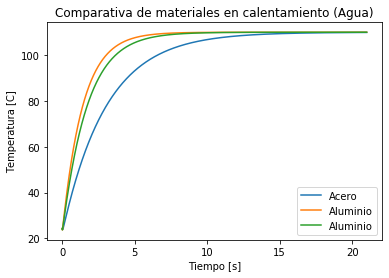

In [20]:
plt.plot(time_S_H, Temp_S_H, label = "Acero")
plt.plot(time_A_H, Temp_A_H, label = "Aluminio")
plt.plot(time_C_H, Temp_C_H, label = "Aluminio")
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [C]')
plt.title('Comparativa de materiales en calentamiento (Agua)')
plt.legend()
plt.savefig('comparative_heating_water.png')
plt.show()

In [19]:
print(t_100_C, t_100_A, t_100_S)

3.6729 3.0261 6.5625
